In [65]:
# Importing Liberaries: 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [66]:
# loading the marketing dataset: 
marketing=pd.read_csv('marketing.csv')
marketing.head()

,user_id,date_served,marketing_channel,variant,converted,language_displayed,language_preferred,age_group,date_subscribed,date_canceled,subscribing_channel,is_retained
0,a100000029,1/1/18,House Ads,personalization,True,English,English,0-18 years,1/1/18,NaN,House Ads,True
1,a100000030,1/1/18,House Ads,personalization,True,English,English,19-24 years,1/1/18,NaN,House Ads,True
2,a100000031,1/1/18,House Ads,personalization,True,English,English,24-30 years,1/1/18,NaN,House Ads,True
3,a100000032,1/1/18,House Ads,personalization,True,English,English,30-36 years,1/1/18,NaN,House Ads,True
4,a100000033,1/1/18,House Ads,personalization,True,English,English,36-45 years,1/1/18,NaN,House Ads,True


# Data Assessing

In [67]:
# Examining data types & null values: 
marketing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10037 entries, 0 to 10036
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   user_id              10037 non-null  object
 1   date_served          10021 non-null  object
 2   marketing_channel    10022 non-null  object
 3   variant              10037 non-null  object
 4   converted            10022 non-null  object
 5   language_displayed   10037 non-null  object
 6   language_preferred   10037 non-null  object
 7   age_group            10037 non-null  object
 8   date_subscribed      1856 non-null   object
 9   date_canceled        577 non-null    object
 10  subscribing_channel  1856 non-null   object
 11  is_retained          1856 non-null   object
dtypes: object(12)
memory usage: 941.1+ KB


In [68]:
# Dataset Description:
print(f'- The Marketing Dataset consists of {marketing.shape[0]} Rows and {marketing.shape[1]} Columns')
print (f'\n- The dataset consists of {marketing.user_id.nunique()} user.\n')
print(f'''
- The Data Selection: 
    Start: {marketing.date_served.astype('datetime64[ns]').min().strftime('%Y-%m-%d')} 
    End  : {marketing.date_served.astype('datetime64[ns]').max().strftime('%Y-%m-%d')}\n''')
print(f'''
- The Subscription Dates: 
    Start: {marketing.date_subscribed.astype('datetime64[ns]').min().strftime('%Y-%m-%d')} 
    End  : {marketing.date_subscribed.astype('datetime64[ns]').max().strftime('%Y-%m-%d')}\n''')
print(f'''
- The Subscription Cancellation occured within: 
    Start: {marketing.date_canceled.astype('datetime64[ns]').min().strftime('%Y-%m-%d')} 
    End  : {marketing.date_canceled.astype('datetime64[ns]').max().strftime('%Y-%m-%d')}\n''')
print('- The Marketing Channels are as follows:')
for x, y in enumerate(marketing.marketing_channel.unique()): 
    print('  ',x+1, '-', y)
print('\n- The Variant categories are as follows:')
for x, y in enumerate(marketing.variant.unique()): 
    print('  ',x+1, '-', y)
print('\n- The Converted column is classified into:')
for x, y in enumerate(marketing.converted.unique()): 
    print('  ',x+1, '-', y)
print('\n- The Displayed Languages are as follows:')
for x, y in enumerate(marketing.language_displayed.unique()): 
    print('  ',x+1, '-', y)
print('\n- The Preferred Languages are as follows:')
for x, y in enumerate(marketing.language_preferred.unique()): 
    print('  ',x+1, '-', y)
print('\n- The Age Groups are classified as follows:')
for x, y in enumerate(marketing.age_group.unique()): 
    print('  ',x+1, '-', y)
print('\n- The Subscribing Channels are as follows:')
for x, y in enumerate(marketing.subscribing_channel.unique()): 
    print('  ',x+1, '-', y)
print('\n- The is_retained column is classified into:')
for x, y in enumerate(marketing.is_retained.unique()): 
    print('  ',x+1, '-', y)

- The Marketing Dataset consists of 10037 Rows and 12 Columns

- The dataset consists of 7309 user.


- The Data Selection: 
    Start: 2018-01-01 
    End  : 2018-01-31


- The Subscription Dates: 
    Start: 2018-01-01 
    End  : 2018-01-31


- The Subscription Cancellation occured within: 
    Start: 2018-01-05 
    End  : 2018-05-09

- The Marketing Channels are as follows:
   1 - House Ads
   2 - Push
   3 - Facebook
   4 - Instagram
   5 - Email
   6 - nan

- The Variant categories are as follows:
   1 - personalization
   2 - control

- The Converted column is classified into:
   1 - True
   2 - False
   3 - nan

- The Displayed Languages are as follows:
   1 - English
   2 - German
   3 - Arabic
   4 - Spanish

- The Preferred Languages are as follows:
   1 - English
   2 - German
   3 - Arabic
   4 - Spanish

- The Age Groups are classified as follows:
   1 - 0-18 years
   2 - 19-24 years
   3 - 24-30 years
   4 - 30-36 years
   5 - 36-45 years
   6 - 45-55 years
   7 - 55+ y

In [69]:
# Summary Statistics
marketing.describe()

,user_id,date_served,marketing_channel,variant,converted,language_displayed,language_preferred,age_group,date_subscribed,date_canceled,subscribing_channel,is_retained
count,10037,10021,10022,10037,10022,10037,10037,10037,1856,577,1856,1856
unique,7309,31,5,2,2,4,4,7,31,115,5,2
top,a100000882,1/15/18,House Ads,control,False,English,English,19-24 years,1/16/18,4/2/18,Instagram,True
freq,12,789,4733,5091,8946,9793,9275,1682,163,15,600,1279


In [70]:
# Identifying Duplicated Values:
if marketing.duplicated().sum() == 0: 
    print('The Dataset has no Duplicated Values')
else: 
    print(f'''
The Dataset has {marketing.duplicated().sum()} Duplicated rows and their indexes are as follows:\n 
{", ".join(map(str,marketing[marketing.duplicated()].index.to_list()))}''')


The Dataset has 37 Duplicated rows and their indexes are as follows:
 
470, 478, 894, 895, 954, 955, 1004, 1005, 1027, 1047, 1051, 3022, 3166, 3196, 3198, 3310, 3498, 3642, 3801, 3803, 4083, 4124, 4129, 4134, 6880, 7440, 7488, 8452, 8454, 8456, 8458, 8486, 8488, 8500, 8502, 8504, 8506


In [71]:
# Identifying the Null Values:
if marketing.isna().sum().sum() == 0: 
    print('The Dataset has no NULL Values')
else: 
    print(f'''The Dataset has {marketing.isna().sum().sum()} NULL Values that are distributed as follows: ''')
marketing.isna().sum().reset_index().rename(columns={'index':'Column_Name',0:'NULLs_Count'}).style.hide()

The Dataset has 34049 NULL Values that are distributed as follows: 


Column_Name,NULLs_Count
user_id,0
date_served,16
marketing_channel,15
variant,0
converted,15
language_displayed,0
language_preferred,0
age_group,0
date_subscribed,8181
date_canceled,9460


In [72]:
# Detemining the indexes of the null values for columns:
# 1- date_served
print(f'''
The date_served column has {marketing.date_served.isna().sum()} null values and their indexes are as follows:\n 
{", ".join(map(str,marketing[marketing.date_served.isna()==True].index.to_list()))}\n''') 

# 2- marketing_channel
print(f'''
The marketing_channel column has {marketing.marketing_channel.isna().sum()} null values and their indexes are as follows:\n 
{", ".join(map(str,marketing[marketing.marketing_channel.isna()==True].index.to_list()))}\n''') 

# 3- converted
print(f'''
The converted column has {marketing.converted.isna().sum()} null values and their indexes are as follows:\n 
{", ".join(map(str,marketing[marketing.converted.isna()==True].index.to_list()))}\n''')


The date_served column has 16 null values and their indexes are as follows:
 
7038, 9944, 9945, 9946, 9947, 9948, 9949, 9950, 9951, 9952, 9953, 9954, 9955, 9956, 9957, 9958


The marketing_channel column has 15 null values and their indexes are as follows:
 
9944, 9945, 9946, 9947, 9948, 9949, 9950, 9951, 9952, 9953, 9954, 9955, 9956, 9957, 9958


The converted column has 15 null values and their indexes are as follows:
 
9944, 9945, 9946, 9947, 9948, 9949, 9950, 9951, 9952, 9953, 9954, 9955, 9956, 9957, 9958



# Data Cleaning: 
## 1- Removing Duplicates


In [73]:
marketing.drop_duplicates(inplace=True)
if marketing.duplicated().sum() == 0: 
    print(f'The Dataset has no Duplicated Values with {marketing.shape[0]} Row')
else: 
    print(f'''
The Dataset has {marketing.duplicated().sum()} Duplicated rows and their indexes are as follows:\n 
{", ".join(map(str,marketing[marketing.duplicated()].index.to_list()))}''')

The Dataset has no Duplicated Values with 10000 Row


In [74]:
marketing.describe()

,user_id,date_served,marketing_channel,variant,converted,language_displayed,language_preferred,age_group,date_subscribed,date_canceled,subscribing_channel,is_retained
count,10000,9984,9985,10000,9985,10000,10000,10000,1845,575,1845,1845
unique,7309,31,5,2,2,4,4,7,31,115,5,2
top,a100000882,1/15/18,House Ads,control,False,English,English,19-24 years,1/16/18,4/1/18,Instagram,True
freq,12,786,4704,5069,8911,9757,9243,1676,162,14,594,1270


## 2- Changing Dates data Type
- ***date_served:*** _str_ to _date_
- ***date_subscribed:*** _str_ to _date_
- ***date_canceled:*** _str_ to _date_


In [75]:
# Changing the data type of date_served: 
marketing['date_served']=pd.to_datetime(marketing['date_served'])
marketing['date_served'].dtype

dtype('<M8[ns]')

In [76]:
# Changing the data type of date_subscribed: 
marketing['date_subscribed']=pd.to_datetime(marketing['date_subscribed'])
marketing['date_subscribed'].dtype

dtype('<M8[ns]')

In [77]:
# Changing the data type of date_canceled: 
marketing['date_canceled']=pd.to_datetime(marketing['date_canceled'])
marketing['date_canceled'].dtype

dtype('<M8[ns]')

## 3- Handling Nulls:
- ***Shared nulls across date_served (except for index 7038), marketing_channel, converted:*** <br>
    Since those columns share the same missing rows, dropping them together avoids keeping incomplete entries that would otherwise distort the analysis.

- ***date_served (index 7038):*** <br>
    Since this is an isolated null in the middle of the dataset, forward-filling (ffill) after sorting by date is a reasonable strategy.


- There is no need to handle the missing values in ***date_subscribed, date_canceled,	subscribing_channel, and is_retained*** as these values are naturally missing depending on whether the user subscribed or not. Filling them would introduce bias.


In [78]:
# Dropping Shared nulls across date_served (except for index 7038), marketing_channel, converted: 
marketing.dropna(subset='marketing_channel', inplace=True)

In [79]:
# Nulls at date_served column 
print(f'''
The date_served column has {marketing.date_served.isna().sum()} null value and its index is {", ".join(map(str,marketing[marketing.date_served.isna()==True].index.to_list()))}\n''')


The date_served column has 1 null value and its index is 7038



In [80]:
# date_served (index 7038):
# Sorting the table by date served
marketing=marketing.sort_values('date_served') 

# Replacing null by forward fill method 
marketing.date_served.fillna(method='ffill', inplace=True)

# Checking:
if marketing.date_served.isna().sum() == 0: 
    print(f'The Null values in date_served Column has been handeled, resulting in a {marketing.date_served.isna().sum()} Null Value for this column')
else: 
    print(f'''The date_served Column has {marketing.date_served.isna().sum()} NULL Values ''')

The Null values in date_served Column has been handeled, resulting in a 0 Null Value for this column


In [81]:
# Checking for Null Values:
if marketing.isna().sum().sum() == 0: 
    print('The Dataset has no NULL Values')
else: 
    print(f'''The Dataset has {marketing.isna().sum().sum()} NULL Values that are distributed as follows: ''')
marketing.isna().sum().reset_index().rename(columns={'index':'Column_Name',0:'NULLs_Count'}).style.hide()

The Dataset has 33830 NULL Values that are distributed as follows: 


Column_Name,NULLs_Count
user_id,0
date_served,0
marketing_channel,0
variant,0
converted,0
language_displayed,0
language_preferred,0
age_group,0
date_subscribed,8140
date_canceled,9410


## 4- Changing converted data type 
- ***converted:*** _str_ to _boolean_

In [82]:
# Changing the data type of converted: 
marketing['converted']=marketing['converted'].astype('bool')
marketing['converted'].dtype

dtype('bool')

## 4- Adding New Columns:
- ***is_house_ad:*** Identifies if a particular marketing asset was a house ad or not _(since it is the most frequent value in this column "4733 out of 10000")_
- ***matched_lang:*** conveys whether the ad was shown to the user in their preferred language
- ***dow:*** service Days starting from Monday till Sunday, t measure the most frequent days

In [83]:
# Adding the is_house_ad Column
marketing['is_house_ad']=[
    True if x=="House Ads" 
    else False for x in marketing.marketing_channel]
marketing.loc[:,['marketing_channel','is_house_ad']].sample(5)

,marketing_channel,is_house_ad
4105,Facebook,False
3564,House Ads,True
443,Facebook,False
7632,Facebook,False
4870,House Ads,True


In [84]:
# Adding matched_lang Column 
marketing['matched_lang']=np.where(marketing['language_displayed']==marketing['language_preferred'],True,False)
marketing.loc[:,['language_displayed','language_preferred','matched_lang']].sample(5)

,language_displayed,language_preferred,matched_lang
3986,English,English,True
7637,English,English,True
4215,English,English,True
9126,English,English,True
7721,English,English,True


In [85]:
# Adding dow column: 
marketing['dow']= ['Mo' if x==0
                  else 'Tu' if x== 1
                  else 'We' if x==2
                  else 'Th' if x==3
                  else 'Fr' if x==4
                  else 'Sa' if x==5
                  else 'Su'for x in marketing.date_served.dt.dayofweek]
marketing.loc[:,['date_served','dow']].sample(5)


,date_served,dow
2737,2018-01-03,We
1932,2018-01-09,Tu
10021,2018-01-16,Tu
5701,2018-01-02,Tu
695,2018-01-20,Sa


## 5- Mapping values to existing columns
> ***Note:*** _Due to the way pandas stores data, in a large dataset, it can be computationally inefficient to store columns of strings. In such cases, it can speed things up to instead store these values as numbers._

- ***marketing_channel*** will be as follows:
   - _House Ads = 1_
   - _Push = 2_
   - _Facebook = 3_
   - _Instagram = 4_
   - _Email = 5_

In [86]:
# Mapping marketing_channel column:
ch_dict={'House Ads' : 1,'Push' : 2,'Facebook' : 3,'Instagram' : 4,'Email' : 5}
marketing['ch_code']=marketing.marketing_channel.map(ch_dict).astype('Int64')
marketing.loc[:,['marketing_channel','ch_code']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9985 entries, 0 to 7038
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   marketing_channel  9985 non-null   object
 1   ch_code            9985 non-null   Int64 
dtypes: Int64(1), object(1)
memory usage: 243.8+ KB


# Data Exploring
## $\color{Red}{Initial\;Investigation}$

In [87]:
# Number of daily users :
daily_users = marketing.groupby(['date_served','dow']).user_id.count().reset_index()\
                        .rename(columns={'date_served':'Date','user_id':'Num_Users'})

daily_users.style.hide()

Date,dow,Num_Users
2018-01-01 00:00:00,Mo,375
2018-01-02 00:00:00,Tu,413
2018-01-03 00:00:00,We,383
2018-01-04 00:00:00,Th,336
2018-01-05 00:00:00,Fr,331
2018-01-06 00:00:00,Sa,315
2018-01-07 00:00:00,Su,280
2018-01-08 00:00:00,Mo,319
2018-01-09 00:00:00,Tu,315
2018-01-10 00:00:00,We,341


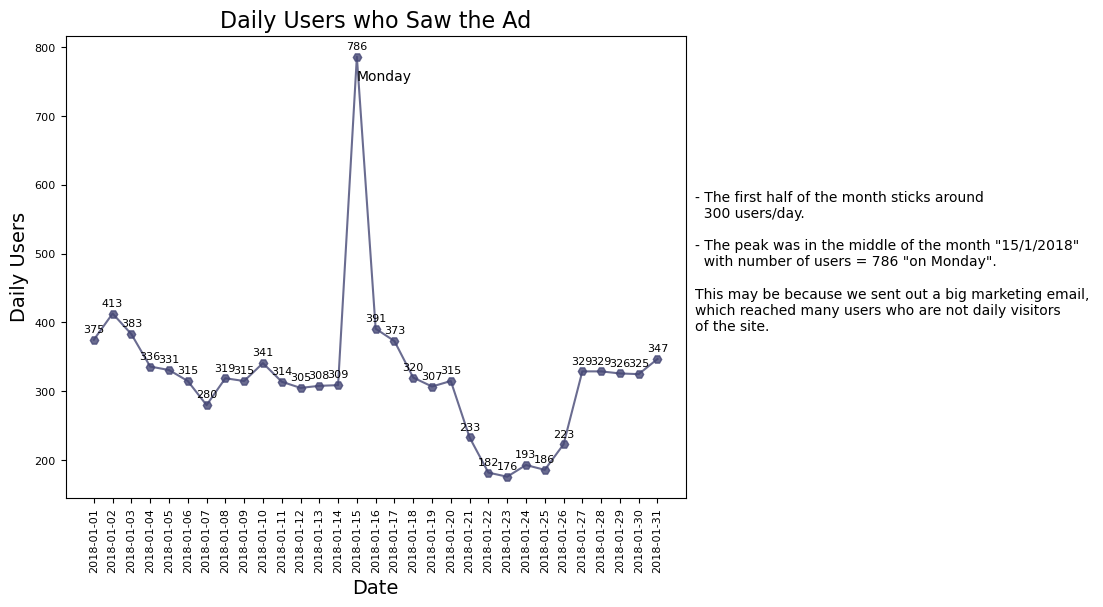

In [88]:
# Visualization: 
# Data
x= daily_users.Date.astype('str').to_list()
y= daily_users.Num_Users

# Creating the Line Chart
plt.subplots(figsize = (8,6))
plt.plot(x,y,color='#454775',marker = 'H', alpha=.8)

# Customizing Chart
plt.title('Daily Users who Saw the Ad',fontsize=16)
plt.xlabel('Date',fontsize=14)
plt.xticks(rotation=90,fontsize=8)
plt.ylabel('Daily Users',fontsize=14)
plt.yticks(fontsize=8)

# Data Annotation with values
for i, v in enumerate(y):
  plt.text(i,v+15, f"{v:.0f}", ha='center', va='center',fontsize=8)

# Findings
text ='''
- The first half of the month sticks around 
  300 users/day.\n
- The peak was in the middle of the month "15/1/2018" 
  with number of users = 786 "on Monday".\n
This may be because we sent out a big marketing email, 
which reached many users who are not daily visitors 
of the site.'''
plt.text(32,500,text,va='center',ha='left')
plt.text('2018-01-15', 767, 'Monday',va='top', ha='left');

In [89]:
# Number of weekday users :
weekday_users = marketing.groupby(['dow']).user_id.count().reset_index()\
                        .rename(columns={'dow':'Day','user_id':'Num_Users'}).sort_values('Num_Users', ascending=False)

weekday_users.style.hide()

Day,Num_Users
Mo,1988
We,1637
Tu,1620
Sa,1267
Fr,1166
Th,1156
Su,1151


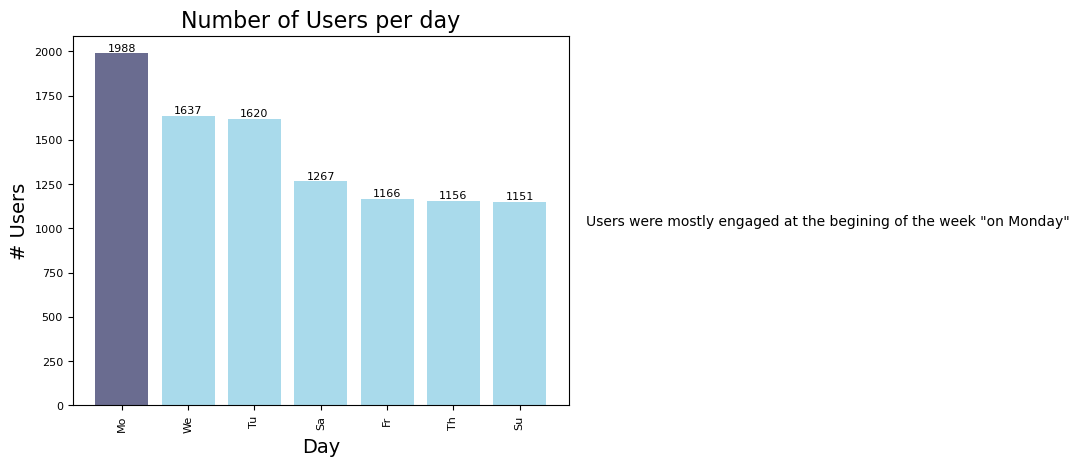

In [90]:
# Visualization:
# Data
x= weekday_users.Day.to_list()
y=weekday_users.Num_Users

# Define bar colors based on performance
colors = ['#454775' if n == y.max() else '#94D1E7' for n in y]

# Create the bar chart
plt.bar(x,y, color=colors, alpha=.8)

# Customizing Chart
plt.title('Number of Users per day',fontsize=16)
plt.xlabel('Day',fontsize=14)
plt.xticks(rotation=90,fontsize=8)
plt.ylabel('# Users',fontsize=14)
plt.yticks(fontsize=8)

# Annotate bars with their values
for i, v in enumerate(y):
  plt.text(i,v+.003, f"{v:.0f}", ha='center', va='bottom',fontsize=8) 

# Findings
text = ''' 
Users were mostly engaged at the begining of the week "on Monday"'''
plt.text(7,1000,text,va='bottom',ha='left');

In [91]:
# Number of users according to variant categories 
var_users = marketing.groupby('variant')['user_id'].count().reset_index()\
                     .rename(columns={'user_id':"num_users",})
var_users['pct']=(var_users.num_users/var_users.num_users.sum())
var_users.style.hide().format({'pct':'{:,.2%}'})

variant,num_users,pct
control,5054,50.62%
personalization,4931,49.38%


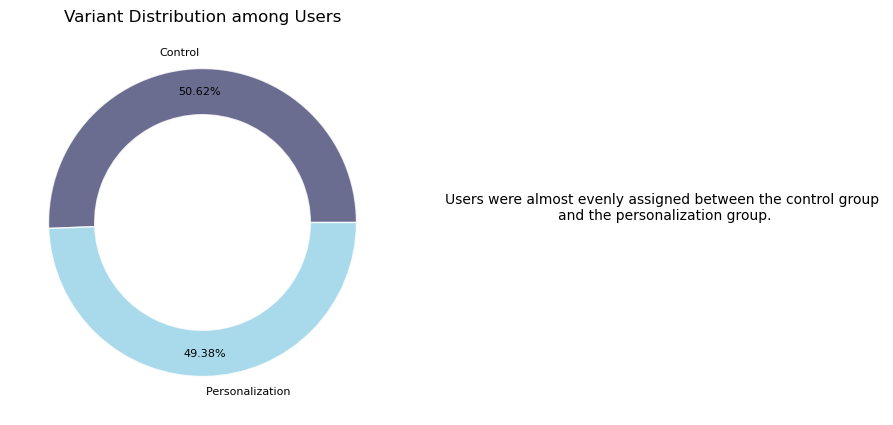

In [92]:
# Visualization: 
# Defining colors based on performance
colors = ['#454775' if n == var_users.pct.max() else '#94D1E7' for n in var_users.pct]

# Creating the Chart
size = 0.3
label_var = 'Control','Personalization '
plt.subplots(figsize = (5,5))
wedges, texts, autotexts=plt.pie(var_users.pct, radius=1, colors= colors,labels = label_var,autopct='%1.2f%%',
        pctdistance=.85,textprops={'fontsize': 8}, wedgeprops=dict(width=size, edgecolor='w'))

# Customizing Chart
for w in wedges:
    w.set_alpha(0.8)  
plt.title('Variant Distribution among Users')

# Findings
text = ''' 
Users were almost evenly assigned between the control group 
and the personalization group.'''
plt.text(3,0,text,ha='center',va='bottom',fontsize = 10, weight = 'normal');


In [93]:
# Number of converted users vs. non-converted users
converted_users = marketing.groupby('converted')['user_id'].count().reset_index()\
                     .rename(columns={'user_id':"num_users",})
converted_users['pct']=(converted_users.num_users/converted_users.num_users.sum())
converted_users.style.format({'pct':'{:,.2%}'})

,converted,num_users,pct
0,False,8911,89.24%
1,True,1074,10.76%


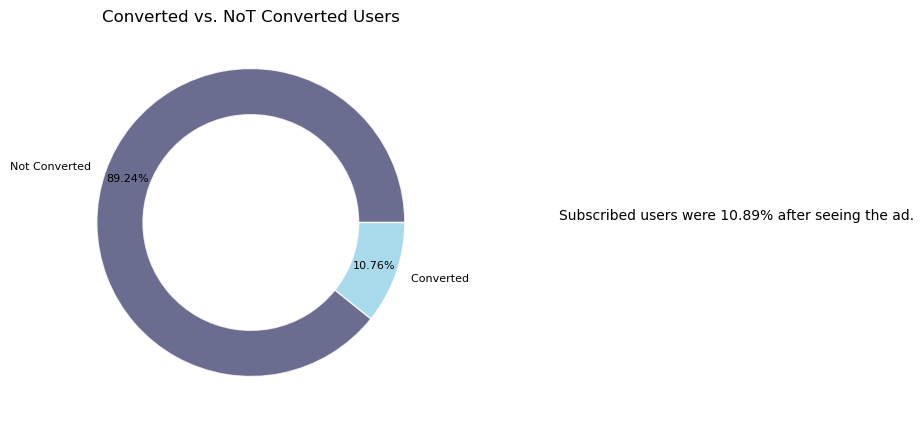

In [94]:
# Visualization: 
# Defining colors based on performance
colors = ['#454775' if n == converted_users.pct.max() else '#94D1E7' for n in converted_users.pct]

# Creating the Chart
size = 0.3
label_con = 'Not Converted','Converted '
plt.subplots(figsize = (5,5))
wedges, texts, autotexts=plt.pie(converted_users.pct, radius=1, colors= colors,labels = label_con,autopct='%1.2f%%',
        pctdistance=.85,textprops={'fontsize': 8}, wedgeprops=dict(width=size, edgecolor='w'))

# Customizing the Chart
for w in wedges:
    w.set_alpha(0.8) 
    
plt.title('Converted vs. NoT Converted Users')

# Findings
text = ''' 
Subscribed users were 10.89% after seeing the ad.'''
plt.text(2,0,text,ha='left',va='bottom',fontsize = 10, weight = 'normal');

In [95]:
# Displayed Lanaguage vs. Preferred Language
lang_displayed=marketing.groupby('language_displayed')['user_id'].count().reset_index()\
              .rename(columns={'language_displayed':'Language','user_id':'Displayed'})
lang_preferred=marketing.groupby('language_preferred')['user_id'].count().reset_index()\
              .rename(columns={'language_preferred':'Language','user_id':'Preferred'})
lang=lang_displayed.merge(lang_preferred,on='Language').sort_values('Displayed')
lang.style.hide()

Language,Displayed,Preferred
Arabic,27,145
German,81,166
Spanish,135,446
English,9742,9228


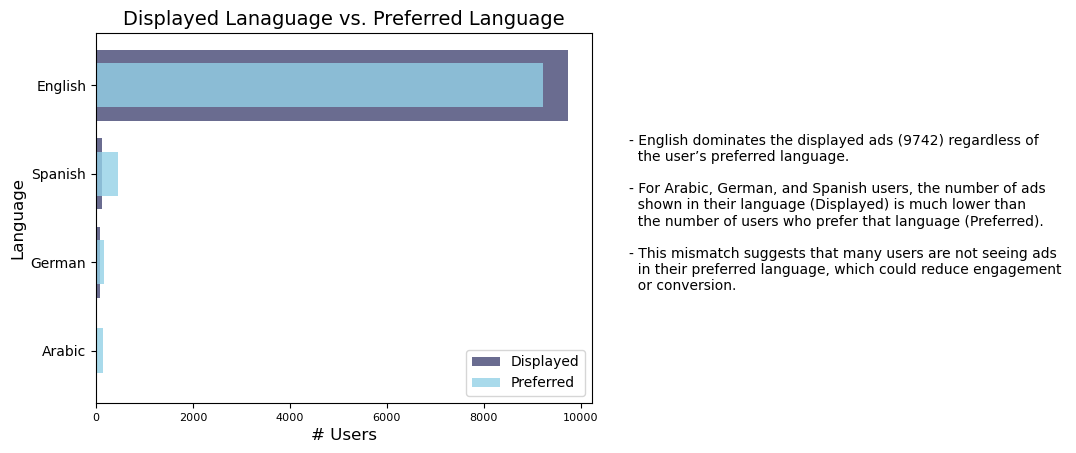

In [96]:
# Visualization
# Data
x=lang.Language.to_list()
y=lang.Displayed
z=lang.Preferred

# Creating the Chart
bin_size=.5
plt.barh(x,y, label='Displayed',color='#454775',alpha=.8)
plt.barh(x,z,bin_size,label='Preferred', color='#94D1E7',alpha=.8)

# Chart Customization
plt.title('Displayed Lanaguage vs. Preferred Language', fontsize=14)
plt.xlabel('# Users', fontsize=12)
plt.xticks(fontsize=8)
plt.ylabel('Language', fontsize=12)
plt.xticks(fontsize=8)
plt.legend()

# Findings
text='''
- English dominates the displayed ads (9742) regardless of 
  the user’s preferred language.\n
- For Arabic, German, and Spanish users, the number of ads 
  shown in their language (Displayed) is much lower than 
  the number of users who prefer that language (Preferred).\n
- This mismatch suggests that many users are not seeing ads 
  in their preferred language, which could reduce engagement 
  or conversion.
'''
plt.text(11000,.5,text);

In [97]:
# Distribution of age among users
age_distribution = marketing.groupby('age_group').user_id.nunique().reset_index().rename(columns={'user_id':'num_users'})
age_distribution['pct']=age_distribution['num_users']/age_distribution['num_users'].sum()
age_distribution.style.hide().format({'pct':'{:,.2%}'})

age_group,num_users,pct
0-18 years,1206,15.31%
19-24 years,1304,16.56%
24-30 years,1218,15.46%
30-36 years,1057,13.42%
36-45 years,1056,13.41%
45-55 years,1056,13.41%
55+ years,979,12.43%


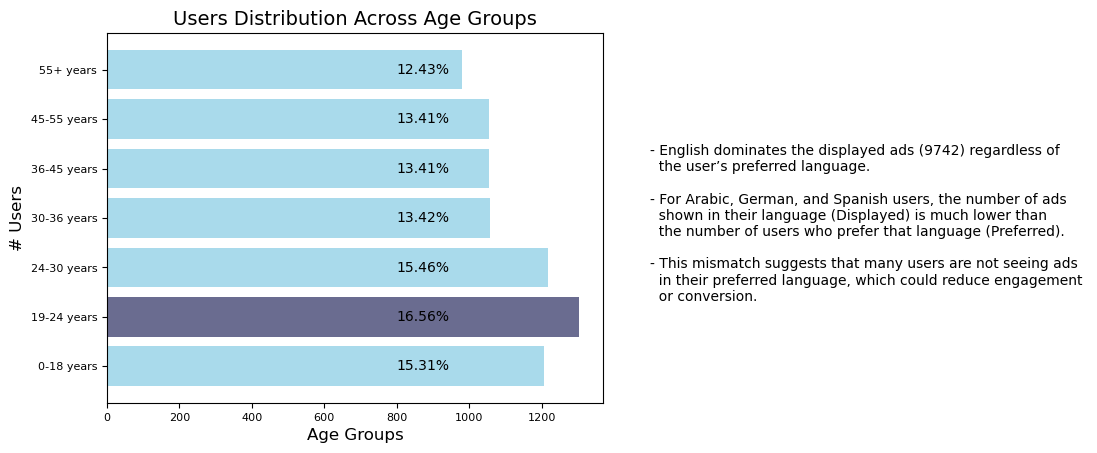

In [98]:
# Visualization
# Data
x= age_distribution.age_group.to_list()
y=age_distribution.num_users

# Defining colors based on performance
colors = ['#454775' if n == y.max() else '#94D1E7' for n in y] 

# Creating the chart
plt.barh(x,y,alpha=.8,color=colors)

# Customizing the Chart
plt.title('Users Distribution Across Age Groups',fontsize=14)
plt.xlabel('Age Groups',fontsize=12)
plt.xticks(fontsize=8)
plt.ylabel('# Users',fontsize=12)
plt.yticks(fontsize=8)

# Annotating bars with values
for i,v in enumerate(age_distribution.pct):
    plt.text(v+800,i,f'{v:.2%}',va='center',ha='left')
    
# Findings
plt.text(1500,1,text);

In [35]:
# Number of users for each marketing channel:
ch_users=marketing.groupby('marketing_channel').user_id.count().reset_index().rename(columns={'user_id':"num_users"})\
                  .sort_values('num_users')
ch_users['pct']=ch_users.num_users/ch_users.num_users.sum()
ch_users.style.hide().format({'pct':'{:.2%}'})

marketing_channel,num_users,pct
Email,563,5.64%
Push,991,9.92%
Facebook,1859,18.62%
Instagram,1868,18.71%
House Ads,4704,47.11%


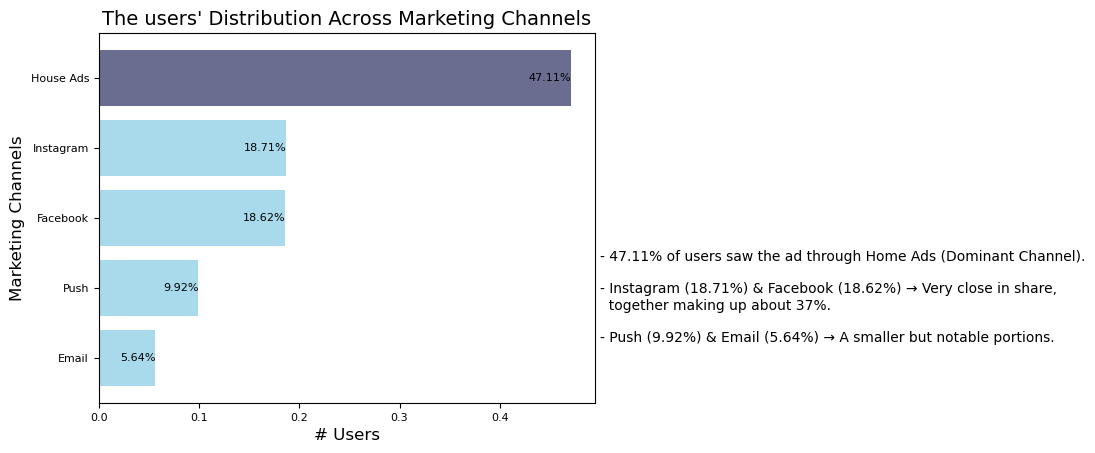

In [99]:
# Visualization: 
# Data
x= ch_users.marketing_channel.to_list()
y= ch_users.pct

# Defining colors based on performance
colors = ['#454775' if n == y.max() else '#94D1E7' for n in y] 

text='''
- 47.11% of users saw the ad through Home Ads (Dominant Channel).\n
- Instagram (18.71%) & Facebook (18.62%) → Very close in share, 
  together making up about 37%.\n
- Push (9.92%) & Email (5.64%) → A smaller but notable portions.
'''
plt.barh(x,y, color=colors, alpha=.8)
plt.title("The users' Distribution Across Marketing Channels", fontsize=14)
plt.xlabel('# Users', fontsize=12)
plt.xticks(fontsize=8)
plt.ylabel('Marketing Channels', fontsize=12)
plt.yticks(fontsize=8)
for i, v in enumerate(y):
    plt.text(v,i,f'{v:.2%}',ha='right', va='center', fontsize=8)
plt.text(.5,0,text);

In [100]:
# Subscribing Channels
sub_channel=marketing.groupby('subscribing_channel')['user_id'].count().reset_index().rename(columns={'user_id':'subscribers_num'})\
                     .sort_values('subscribers_num')
sub_channel.style.hide()

subscribing_channel,subscribers_num
Push,167
Email,286
House Ads,354
Facebook,444
Instagram,594


In [101]:
# Retained Subscribers 
retained = marketing.query('is_retained == True').groupby('subscribing_channel').is_retained.count().reset_index()\
                    .rename(columns={'is_retained':'retained_num'}).sort_values('retained_num') 

retained.style.hide()

subscribing_channel,retained_num
Push,122
House Ads,198
Email,211
Facebook,320
Instagram,419


In [102]:
# Merging subscribing channeles and retained subscribers
subscribers = sub_channel.merge(retained,on='subscribing_channel')
subscribers['retained_pct']=subscribers['retained_num']/subscribers['subscribers_num']
subscribers['middle_pt']=(subscribers['subscribers_num']/2)
subscribers.style.hide().format({'retained_pct':'{:.2%}','middle_pt':'{:.0f}'})

subscribing_channel,subscribers_num,retained_num,retained_pct,middle_pt
Push,167,122,73.05%,84
Email,286,211,73.78%,143
House Ads,354,198,55.93%,177
Facebook,444,320,72.07%,222
Instagram,594,419,70.54%,297


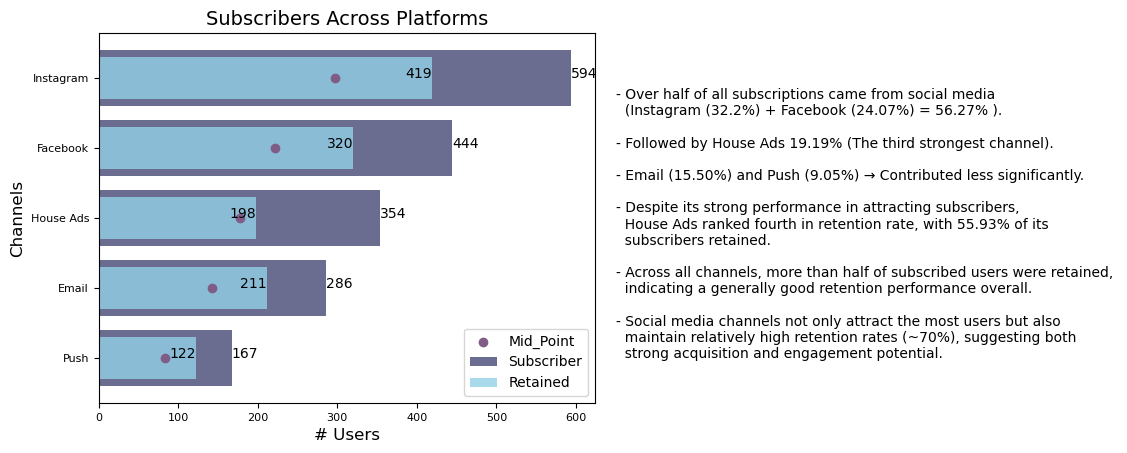

In [130]:
# Visualization 
# Data
x= subscribers.subscribing_channel.to_list()
y= subscribers.subscribers_num
z=subscribers.retained_num
mid_point=subscribers.middle_pt

# Creating the chart
size=.6
plt.barh(x,y,alpha=.8, color='#454775', label='Subscriber')
plt.barh(x,z,size,alpha=.8, color='#94D1E7',label='Retained')
plt.scatter(mid_point,x, label='Mid_Point', color = '#805D87')

# Customizing the chart
plt.title('Subscribers Across Platforms',fontsize=14)
plt.ylabel('Channels', fontsize=12)
plt.yticks(fontsize=8)
plt.xlabel('# Users', fontsize=12)
plt.xticks(fontsize=8)
plt.legend() 

# Annotating bars with values
for i,v in enumerate(y): 
    plt.text(v,i,v)
for i,v in enumerate(z): 
    plt.text(v,i,v,ha='right')

# Findings
text=''' 
- Over half of all subscriptions came from social media 
  (Instagram (32.2%) + Facebook (24.07%) = 56.27% ).\n
- Followed by House Ads 19.19% (The third strongest channel).\n 
- Email (15.50%) and Push (9.05%) → Contributed less significantly.\n
- Despite its strong performance in attracting subscribers, 
  House Ads ranked fourth in retention rate, with 55.93% of its 
  subscribers retained.\n
- Across all channels, more than half of subscribed users were retained, 
  indicating a generally good retention performance overall.\n
- Social media channels not only attract the most users but also 
  maintain relatively high retention rates (~70%), suggesting both 
  strong acquisition and engagement potential.'''
plt.text(650,0,text)

plt.show()

## $\color{Red}{Q1:}$ ***Was the campaign successful?***

In [136]:
# Calculating Conversion Rate
converted_users= marketing.query('converted == True')
converted=converted_users.user_id.nunique()
total_users = marketing.user_id.nunique()
conversion_rate = converted/total_users
print(f'Conversion Rate = {round(conversion_rate*100,2)}%')

Conversion Rate = 13.92%


In [135]:
# Calculating Conversion Rate across marketing channels
conversion_ch=converted_users.groupby('subscribing_channel').user_id.nunique().reset_index()\
                             .rename(columns={'subscribing_channel':'channel','user_id':'converted'})
users_ch = marketing.groupby('marketing_channel').user_id.nunique().reset_index()\
                    .rename(columns={'marketing_channel':'channel','user_id':'total_users'})
conversion =users_ch.merge(conversion_ch, on ='channel')
conversion['conversion_rate']=conversion['converted']/conversion['total_users']
conversion = conversion.sort_values('conversion_rate', ascending= False)
conversion.style.hide().format({'conversion_rate':'{:,.2%}'})

channel,total_users,converted,conversion_rate
Email,553,161,29.11%
Instagram,1740,232,13.33%
Facebook,1758,221,12.57%
Push,972,77,7.92%
House Ads,3968,298,7.51%


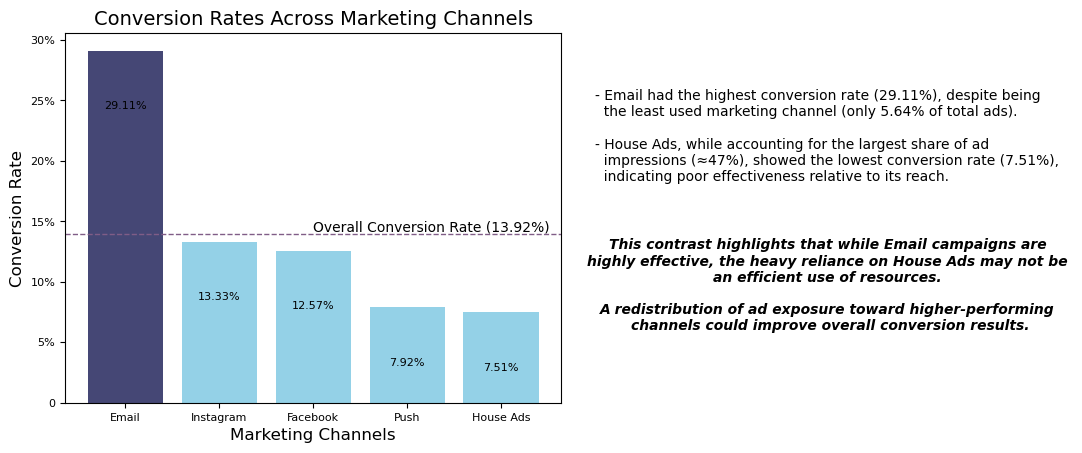

In [171]:
# Visualization: 
# Data
x= conversion.channel.to_list()
y= conversion.conversion_rate

# Defining colors based on performance
colors = ['#454775' if n > conversion_rate else '#94D1E7' for n in y] 

# Creating the chart
plt.bar(x,y, color=colors)
plt.axhline(y=conversion_rate, color='#805D87', linestyle='--', linewidth=1, label='Overall CR')

# Customizing the chart
plt.title('Conversion Rates Across Marketing Channels', fontsize=14)
plt.xlabel('Marketing Channels', fontsize=12)
plt.xticks(fontsize=8)
plt.ylabel('Conversion Rate', fontsize=12)
plt.yticks([0,.05,.1,.15,.2,.25,.3],['0','5%','10%','15%','20%','25%','30%'], fontsize=8)

# Annotating chart with values
plt.text(2,.1392, 'Overall Conversion Rate (13.92%)', ha= 'left', va ='bottom')
for i,v in enumerate(y):
    plt.text(i,v-.05,f'{v:.2%}',va='bottom',ha='center', fontsize=8)

# Findings 
text='''
- Email had the highest conversion rate (29.11%), despite being 
  the least used marketing channel (only 5.64% of total ads).\n
- House Ads, while accounting for the largest share of ad 
  impressions (≈47%), showed the lowest conversion rate (7.51%), 
  indicating poor effectiveness relative to its reach.\n'''
text2='''
This contrast highlights that while Email campaigns are 
highly effective, the heavy reliance on House Ads may not be 
an efficient use of resources. \n
A redistribution of ad exposure toward higher-performing 
channels could improve overall conversion results.'''
plt.text(5,.17,text)
plt.text(7.5,.06,text2, ha='center',fontstyle='italic',weight='semibold', fontsize=10);

In [42]:
# Calculating Retention Rate (spaning 1 month)
retained_users = marketing.query('is_retained == True')
retained=retained_users.user_id.nunique()
retention_rate = retained/converted
print(f'Retention Rate = {round(retention_rate*100,2)}%')

Retention Rate = 66.8%


In [172]:
# Calculating Retention Rate across marketing channels
retained_ch=retained_users.groupby('subscribing_channel').user_id.nunique().reset_index()\
                             .rename(columns={'subscribing_channel':'channel','user_id':'retained'})
retention = conversion_ch.merge(retained_ch, on='channel')
retention['retention_rate']=retention['retained']/retention['converted']
retention=retention.sort_values('retention_rate', ascending=False)
retention.style.hide().format({'retention_rate':'{:,.2%}'})

channel,converted,retained,retention_rate
Email,161,141,87.58%
Push,77,54,70.13%
Facebook,221,152,68.78%
Instagram,232,158,68.10%
House Ads,298,173,58.05%


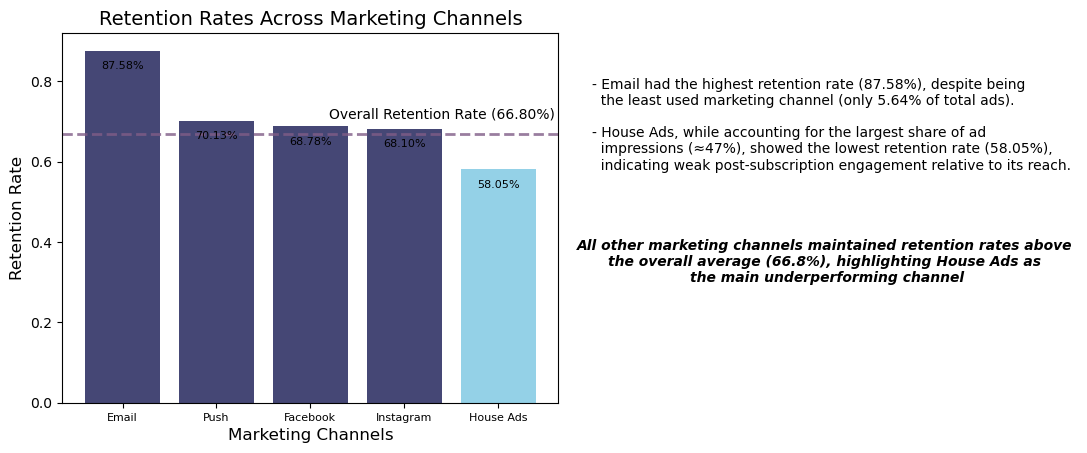

In [189]:
# Visualization: 
# Data
x= retention.channel.to_list()
y= retention.retention_rate

# Defining colors based on performance
colors = ['#454775' if n > retention_rate else '#94D1E7' for n in y] 

# Creating the chart
plt.bar(x,y, color=colors)
plt.axhline(y=retention_rate, color='#805D87', linestyle='--', linewidth=2, label='Overall RR', alpha=.8)

# Customizing the chart
plt.title('Retention Rates Across Marketing Channels', fontsize=14)
plt.xlabel('Marketing Channels', fontsize=12)
plt.xticks(fontsize=8)
plt.ylabel('Retention Rate', fontsize=12)
#plt.yticks([0,.05,.1,.15,.2,.25,.3],['0','5%','10%','15%','20%','25%','30%'], fontsize=8)

# Annotating chart with values
plt.text(2.2,.7, 'Overall Retention Rate (66.80%)', ha= 'left', va ='bottom')
for i,v in enumerate(y):
    plt.text(i,v-.05,f'{v:.2%}',va='bottom',ha='center', fontsize=8)

# Findings 
text='''
- Email had the highest retention rate (87.58%), despite being 
  the least used marketing channel (only 5.64% of total ads).\n
- House Ads, while accounting for the largest share of ad 
  impressions (≈47%), showed the lowest retention rate (58.05%), 
  indicating weak post-subscription engagement relative to its reach.\n
'''
text2='''
All other marketing channels maintained retention rates above 
the overall average (66.8%), highlighting House Ads as 
the main underperforming channel'''
plt.text(5,.5,text)
plt.text(7.5,.3,text2, ha='center',fontstyle='italic',weight='semibold', fontsize=10);